In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [55]:
mall_segmentation1 = pd.read_csv(r"C:\Users\Lucy\Downloads\archive (36).zip")

In [4]:
mall_segmentation1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Check the various attributes of data like shape (rows and cols), Columns, datatypes


mall_segmentation1.shape


(200, 5)

In [6]:
# Checking the data types of all the columns

mall_segmentation1.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# change customer int64 to index
mall_segmentation1.index = mall_segmentation1.iloc[:, 0]

In [9]:
#drop customer colum
mall_segmentation1 = mall_segmentation1.drop(["CustomerID"], axis = 1)
mall_segmentation1.index.name = None

In [10]:
#checking for null
print("There is {} null values in this dataset".format(mall_segmentation1.isnull().sum().sum()))


There is 0 null values in this dataset


In [11]:
#checking for duplicates
print("There is {} duplicated values in this dataset".format(mall_segmentation1.duplicated().sum()))

There is 0 duplicated values in this dataset


In [12]:
mall_segmentation1.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



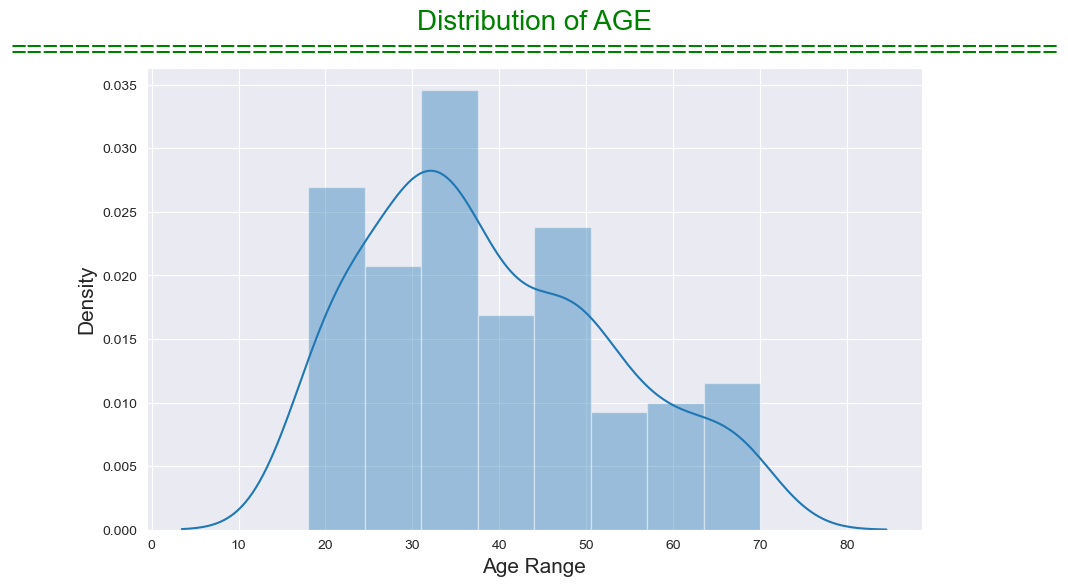

In [46]:
#in summary There are customers of wide variety of ages
# Checking Age Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(mall_segmentation1.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



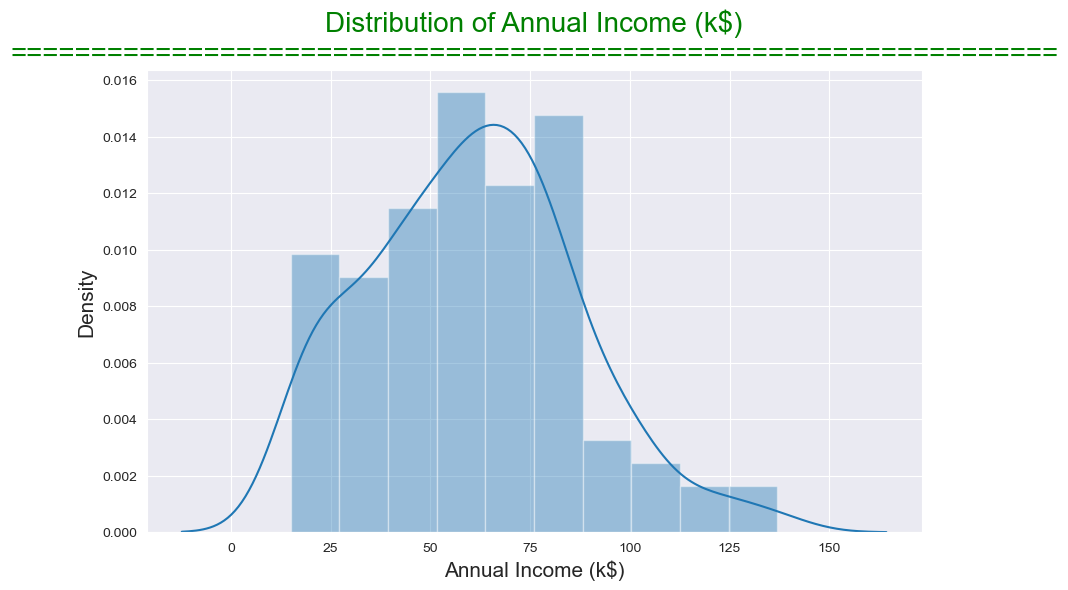

In [48]:
#Bivariate Analysis
#We can see from the above analysis that Most of the annual income falls between 50K to 85K.

# Annual Income (k$) Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.distplot(mall_segmentation1["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()


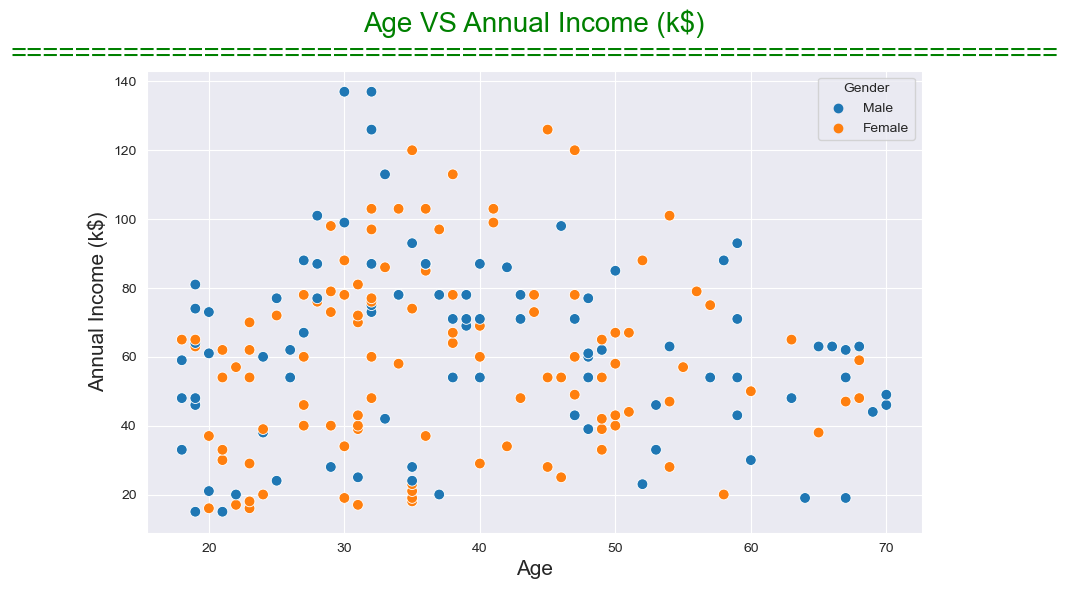

In [50]:
# Bivariate Analysis - Numerical-Numerical Data Type
# Age VS Anual Income

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=mall_segmentation1, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()



In [7]:
#4. Rescaling


mall_segmentation1_scaled = mall_segmentation1[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
mall_segmentation1_scaled_fit = scaler.fit_transform(mall_segmentation1_scaled)


In [8]:
mall_segmentation1_scaled_fit = pd.DataFrame(mall_segmentation1_scaled_fit)
mall_segmentation1_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
mall_segmentation1_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [9]:
var_list = mall_segmentation1_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]


In [10]:
# Model Building


# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=4)

In [11]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [12]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(var_list)
    
    ssd.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


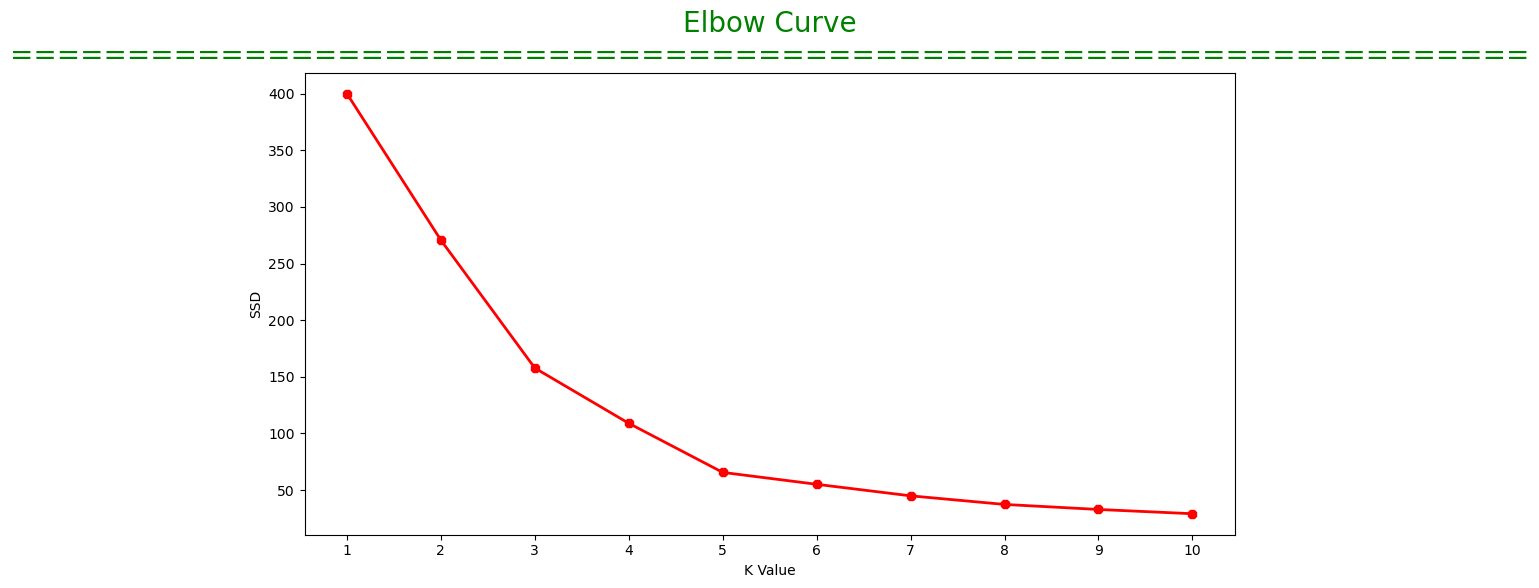

In [13]:
#Finding the Optimal Number of Clusters
#The elbow curve¶
#Conclusion - From the above Elbow curve we will take the value of K=5 and rebuild the cluster.



plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()


In [14]:
# K=5

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)


KMeans(max_iter=50, n_clusters=5)

In [15]:
kmeans.labels_


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [17]:
mall_segmentation1["Label"] = kmeans.labels_


In [19]:
mall_segmentation1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


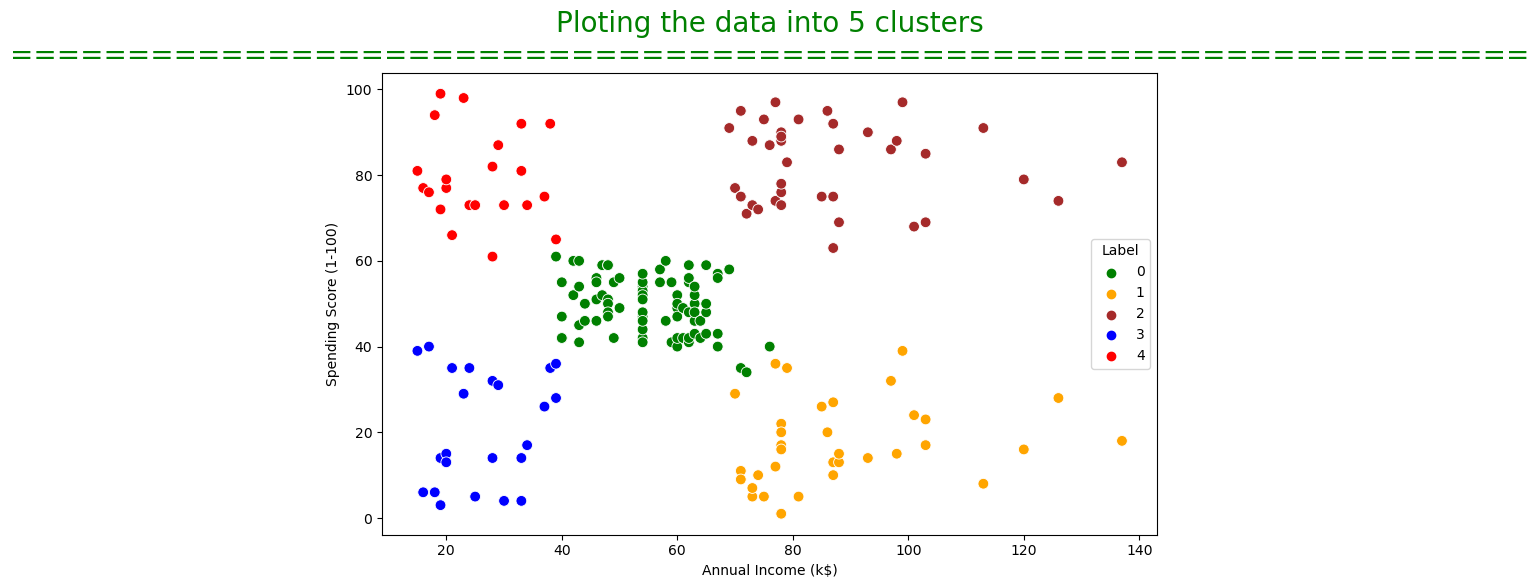

In [21]:
# ScatterPlot when K=5
#Conclusion - From the above we can see that the data has been clustered into 5 different parts.


plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters\n=================================================================", fontsize=20, color="green")
sns.scatterplot(data=mall_segmentation1, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()


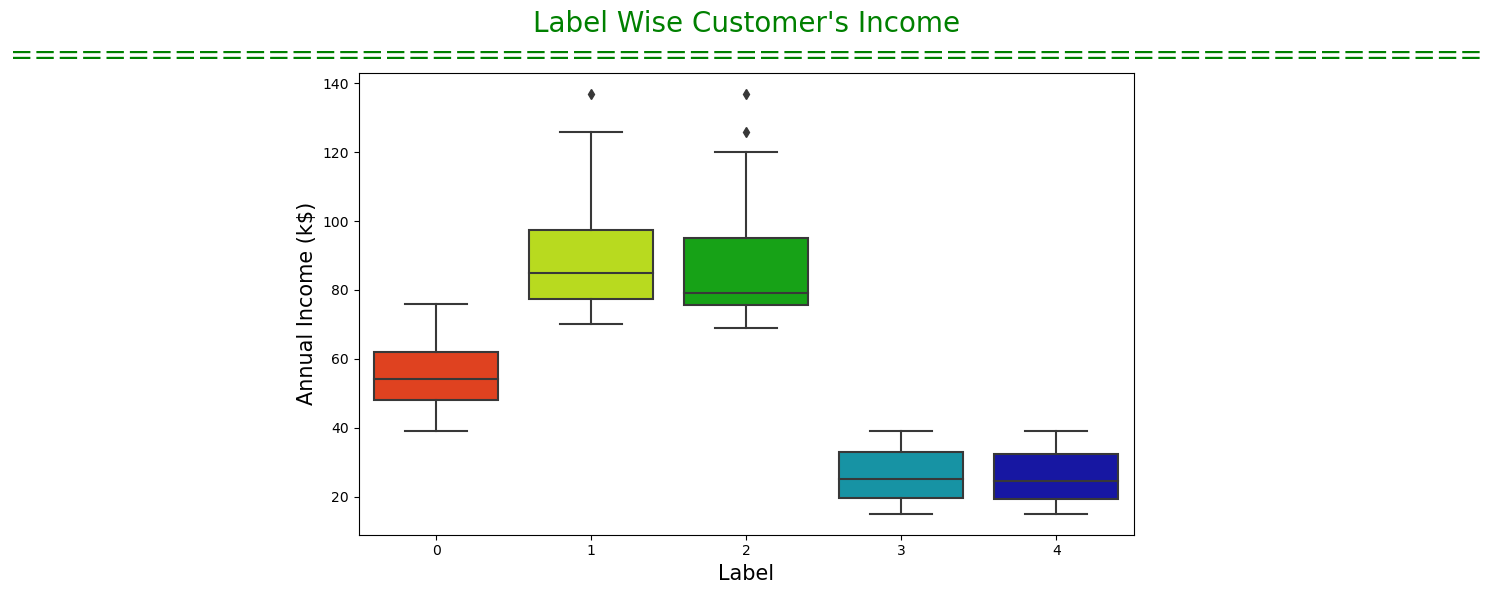

In [23]:
# plot
#Conclusion - Customer segment 1 and 4 are having high Annual income.


plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Annual Income (k$)', data=mall_segmentation1, palette="nipy_spectral_r")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

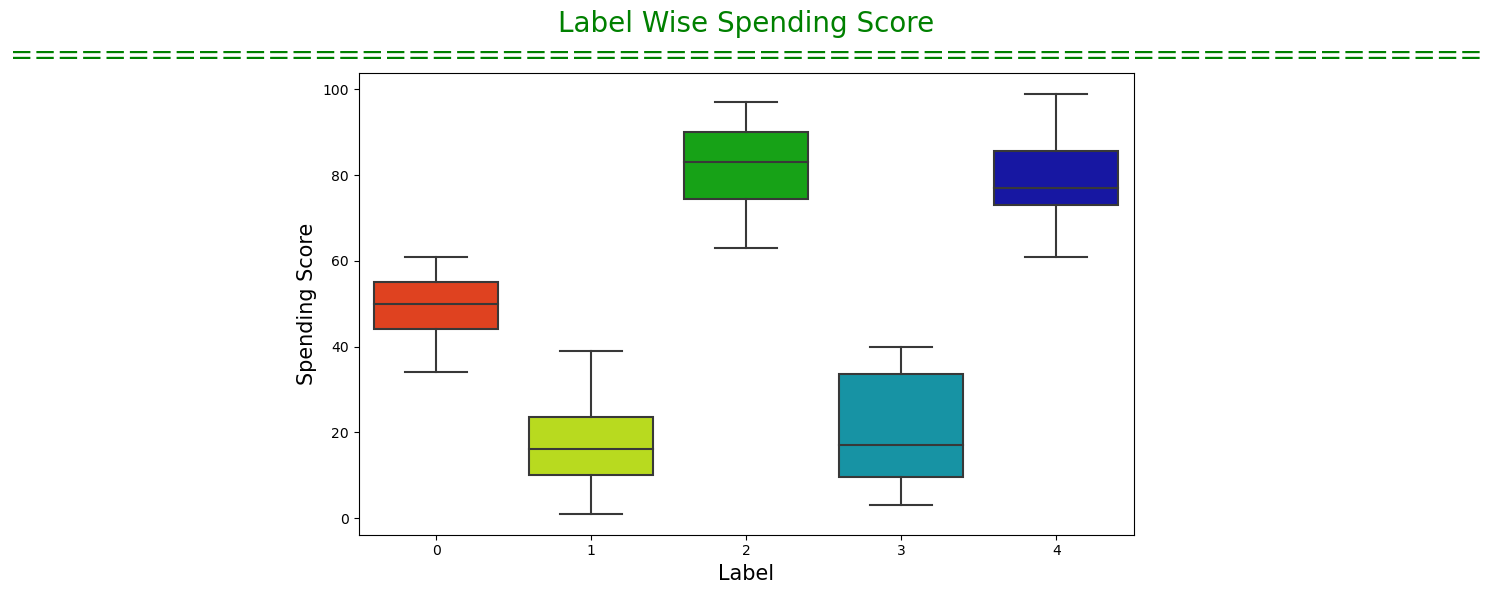

In [25]:
# plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Spending Score (1-100)', data=mall_segmentation1, palette="nipy_spectral_r")
plt.title("Label Wise Spending Score\n===============================================================", fontsize=20, color="green")
plt.xlabel(xlabel="Label", fontsize=15)
plt.ylabel(ylabel="Spending Score",fontsize=15)
plt.show()


In [27]:
# Getting the CustomerId for each group

cust1 = mall_segmentation1[mall_segmentation1.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = mall_segmentation1[mall_segmentation1.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = mall_segmentation1[mall_segmentation1.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = mall_segmentation1[mall_segmentation1.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = mall_segmentation1[mall_segmentation1.Label==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")


The number of customers in 1st group =  81
The Customer Id are -  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

The number of customers in 2nd group =  35
The Customer Id are -  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

The number of customers in 3rd group =  39
The Customer Id are -  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

The number of customers in 4th group =  23
The Customer Id are -  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

The number of customers in 5

In [29]:
mall_segmentation1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [30]:
# Clustering on the basis of 3 features.

var_list_1 = mall_segmentation1_scaled_fit[["Age","Annual Income (k$)","Spending Score (1-100)"]]


In [31]:
var_list_1.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [32]:
# Model Fitting

kmeans1 = KMeans(n_clusters=5, max_iter=50)
kmeans1.fit(var_list_1)

KMeans(max_iter=50, n_clusters=5)

In [33]:
kmeans1.labels_


array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2,
       3, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 1, 2, 2, 2, 4, 4, 4, 4, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [35]:
mall_segmentation1["Label"] = kmeans1.labels_
mall_segmentation1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [36]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(var_list_1)
    
    ssd.append(kmeans1.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


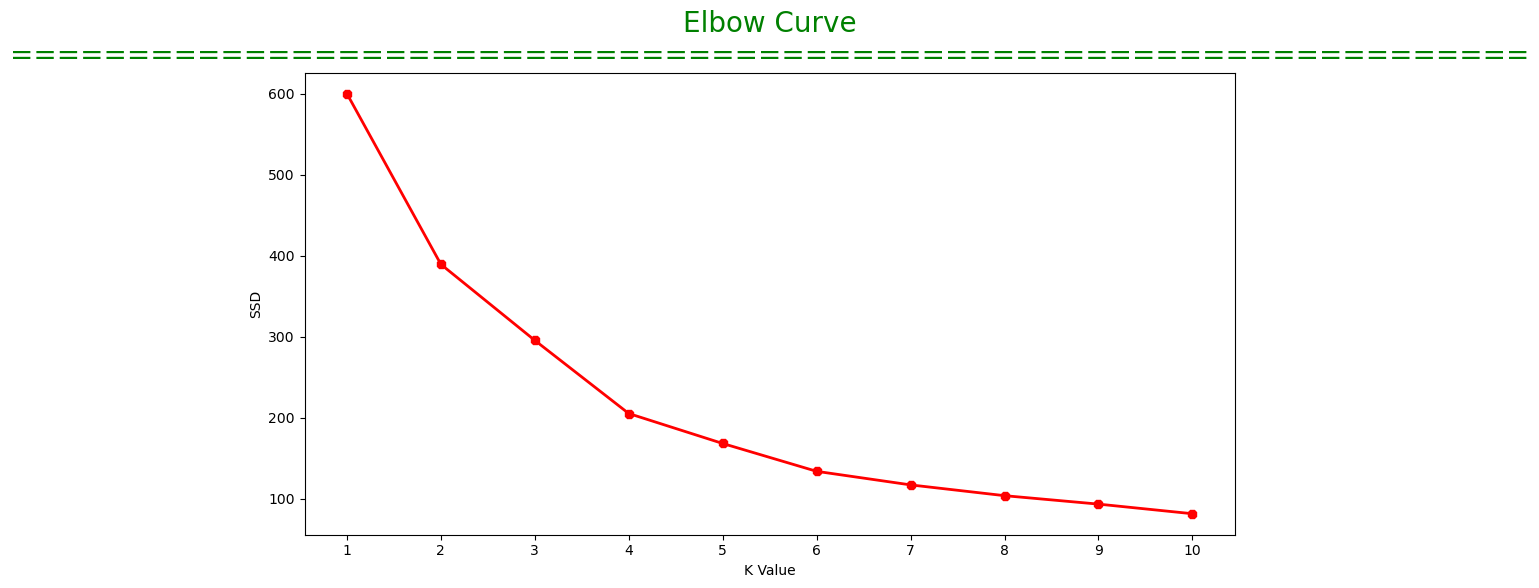

In [37]:
# Elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()

In [52]:
from mpl_toolkits.mplot3d import Axes3D


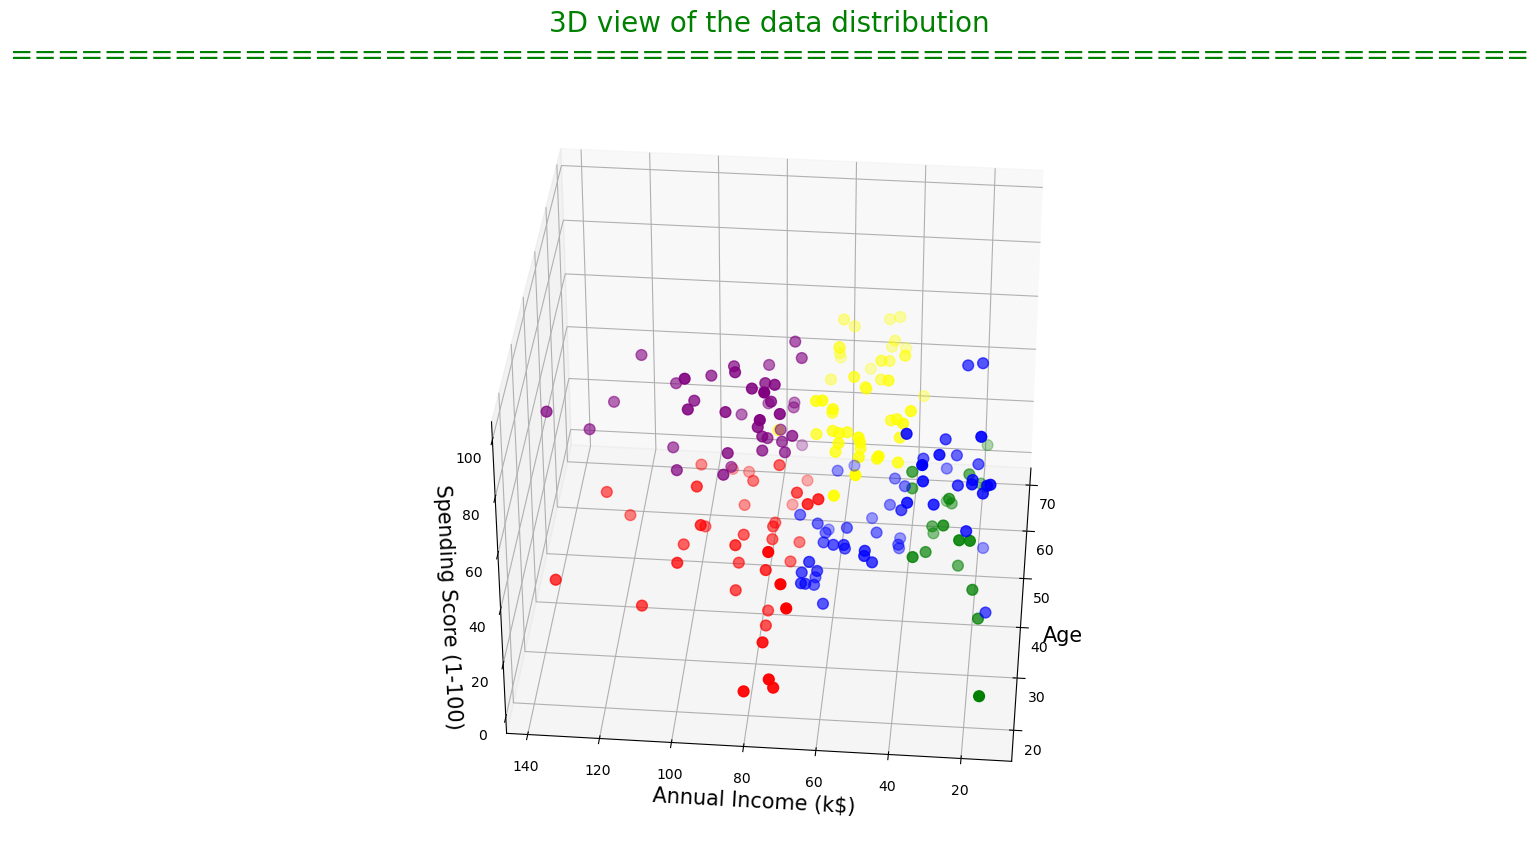

In [40]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall_segmentation1.Age[mall_segmentation1.Label == 0], mall_segmentation1["Annual Income (k$)"][mall_segmentation1.Label == 0], mall_segmentation1["Spending Score (1-100)"][mall_segmentation1.Label == 0], c='purple', s=60)
ax.scatter(mall_segmentation1.Age[mall_segmentation1.Label == 1], mall_segmentation1["Annual Income (k$)"][mall_segmentation1.Label == 1], mall_segmentation1["Spending Score (1-100)"][mall_segmentation1.Label == 1], c='red', s=60)
ax.scatter(mall_segmentation1.Age[mall_segmentation1.Label == 2], mall_segmentation1["Annual Income (k$)"][mall_segmentation1.Label == 2], mall_segmentation1["Spending Score (1-100)"][mall_segmentation1.Label == 2], c='blue', s=60)
ax.scatter(mall_segmentation1.Age[mall_segmentation1.Label == 3], mall_segmentation1["Annual Income (k$)"][mall_segmentation1.Label == 3], mall_segmentation1["Spending Score (1-100)"][mall_segmentation1.Label == 3], c='green', s=60)
ax.scatter(mall_segmentation1.Age[mall_segmentation1.Label == 4], mall_segmentation1["Annual Income (k$)"][mall_segmentation1.Label == 4], mall_segmentation1["Spending Score (1-100)"][mall_segmentation1.Label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.title("3D view of the data distribution\n=================================================================", fontsize=20, color="green")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
ax.set_zlabel('Spending Score (1-100)', fontsize=15)
plt.show()


In [41]:
# Printing the customerID according to the groups.

cust1 = mall_segmentation1[mall_segmentation1.Label==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = mall_segmentation1[mall_segmentation1.Label==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = mall_segmentation1[mall_segmentation1.Label==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = mall_segmentation1[mall_segmentation1.Label==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = mall_segmentation1[mall_segmentation1.Label==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")


The number of customers in 1st group =  40
The Customer Id are -  [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200]

The number of customers in 2nd group =  39
The Customer Id are -  [113 122 125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155
 157 159 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193
 195 197 199]

The number of customers in 3rd group =  54
The Customer Id are -  [  1   2   4   5   6   8  10  12  14  16  18  20  22  24  26  28  30  32
  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66  69  70  76
  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114 115 116 121]

The number of customers in 4th group =  20
The Customer Id are -  [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]

The number of customers in 5th group =  47
The Customer Id are -  [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68